In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_excel('/Users/gautamborgohain/Google Drive/Data Extraction /actors_scores.xlsx')
df.head()

,name,BAFTA_noms,BAFTA_wins,BFCAA_noms,BFCAA_wins,GG_noms,GG_wins,Oscar_noms,Oscar_wins,SAG_noms,...,Big_5_nom_rate,Big_5_strike_rate,Big_5_Win_rate,Nom_Weighted,Win_Weighted,BONUS1,BONUS2,Bouns,Total Score((Normalized)),Total Score(Not weighted)
0,Tom Holland,0,0,1,0,0,0,0,0,0,...,0.083333,0.000000,0.000000,21,27,0,0,0,4.000000,2.416667
1,Alexandra Daddario,0,0,0,0,0,0,0,0,0,...,0.000000,NaN,0.000000,4,0,0,0,0,0.102564,0.102564
2,Tom Hardy,2,1,2,1,0,0,1,0,0,...,0.102041,0.400000,0.040816,90,52,0,0,0,2.897959,2.061224
3,Leonardo DiCaprio,4,1,7,2,11,3,6,1,9,...,1.000000,0.216216,0.216216,312,256,2,3,5,15.486486,9.594595
4,Robin Wright,0,0,0,0,4,1,0,0,7,...,0.207547,0.090909,0.018868,64,32,0,0,0,1.811321,1.188679


In [20]:
import numpy as np
import pylab as pl

class Radar(object):

    def __init__(self, fig, titles, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.95, 0.95]

        self.n = len(titles)
        self.angles = np.arange(0, 0+360, 360.0/self.n)
        self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i) 
                         for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=titles, fontsize=14)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, 7), angle=angle, labels=label)
            ax.spines["polar"].set_visible(False)
            ax.set_ylim(0, 6)
#         self.fig = fig

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
#         self.fig.savefig('to.png') 



In [21]:

def compareActors(act1,act2):
    plt.style.use('seaborn-darkgrid')
    
    titles = ['Overall Nomination Rate','Overall Strike Rate','Overall Win Rate','Big 5 nommination rate','Big 5 strike rate','Big 5 Win rate']
    labels = [
        list("12345"), list("12345"), list("12345"), 
       list("12345"),list("12345"),list("12345")
    ]
    fig = pl.figure(figsize=(8, 8))
    
    #Search dataframe for the actor
    
    A = df[df['name']==act1][['name','Nom_rate','strike_rate','Win_rate','Big_5_nom_rate','Big_5_strike_rate','Big_5_Win_rate']]
    A = np.array(A).ravel()
    Act1 = A[0]# Actor name
    A = A[1:len(A)]
    
    B = df[df['name']==act2][['name','Nom_rate','strike_rate','Win_rate','Big_5_nom_rate','Big_5_strike_rate','Big_5_Win_rate']]
    B = np.array(B).ravel()
    Act2 = B[0]# Actor name
    B = B[1:len(B)]
    
    combined = A+B
    Max = 5
    Min = 1
    actualMax = np.max(combined)
    actualMin = np.min(combined)

    percentA = (A - actualMin) / (actualMax - actualMin);
    outputA = percentA * (Max - Min) + Min;

    percentB = (B - actualMin) / (actualMax - actualMin);
    outputB = percentB * (Max - Min) + Min;

    radar = Radar(fig, titles, labels)
    radar.plot(outputA,"-", lw=2, color="b", alpha=0.4, label=Act1)
    radar.plot(outputB,"-", lw=2, color="r", alpha=0.4, label=Act2)
    radar.ax.legend(loc = (-0.3,0.1))
    


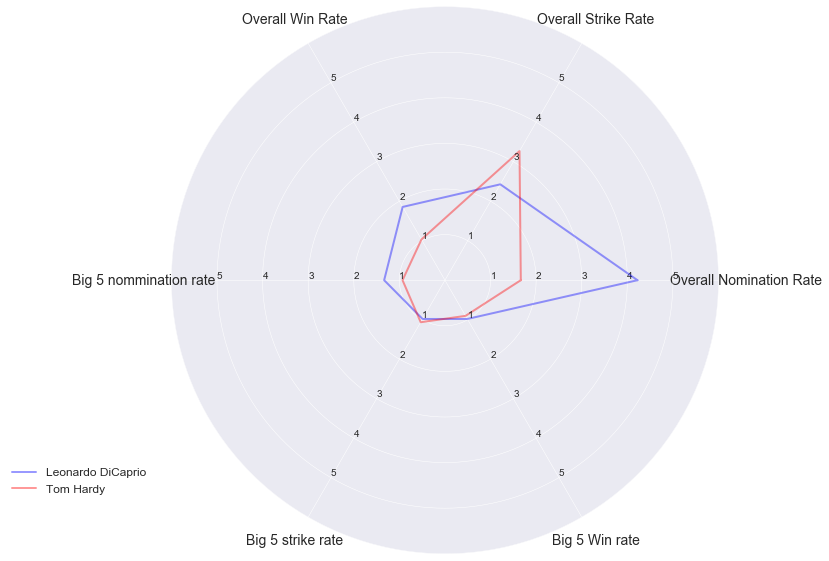

In [22]:
compareActors('Leonardo DiCaprio','Tom Hardy')